# Predicting bay area home price
The dataset is from Zillow. The goal is predicting the house price. We will use Linear regression, Ridge regression, Lasso regression and elasticnet regresssion models in this file. 

<p> <img src="files/img/bay_area_house.png" style="width:800px"></p>

# 0. Intro
* Based on v1, we add exploratory data analysis

# 1. Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# 2. Load data

In [3]:
df = pd.read_csv('datasets/final_data.csv')
df.head()

,Unnamed: 0,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,2,Address: 1160 Mission Street #2007,San FranciscoSales price: 1300000Sales date: ...,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,83152781.0
1,5,Address: 260 King Street #475,San FranciscoSales price: 750000Sales date: 0...,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,69819817.0
2,7,Address: 560 Missouri Street #B,San FranciscoSales price: 1495000Sales date: ...,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,64972847.0
3,9,Address: 350 Missouri Street,San FranciscoSales price: 2700000Sales date: ...,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,15149489.0
4,11,Address: 3658 Folsom Street,San FranciscoSales price: 1530000Sales date: ...,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110.0,15161978.0


## EDA
* There are 11330 rows and 19 columns
* There is no missing data
* Columns contain text data: address, info, z_address
* Columns contain categoriacal data: neighborhood, usecode
* Object data: lastsolddate, zindexvalue
* The target is: lastsoldprice

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 19 columns):
Unnamed: 0       11330 non-null int64
address          11330 non-null object
info             11330 non-null object
z_address        11330 non-null object
bathrooms        11330 non-null float64
bedrooms         11330 non-null float64
finishedsqft     11330 non-null float64
lastsolddate     11330 non-null object
lastsoldprice    11330 non-null float64
latitude         11330 non-null float64
longitude        11330 non-null float64
neighborhood     11330 non-null object
totalrooms       11330 non-null float64
usecode          11330 non-null object
yearbuilt        11330 non-null float64
zestimate        11330 non-null float64
zindexvalue      11330 non-null object
zipcode          11330 non-null float64
zpid             11330 non-null float64
dtypes: float64(11), int64(1), object(7)
memory usage: 1.6+ MB


### Drop Duplicates rows
* Return DataFrame with duplicate rows removed
* It turns out in this case there is no dupliates rows

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11330 entries, 0 to 11329
Data columns (total 19 columns):
Unnamed: 0       11330 non-null int64
address          11330 non-null object
info             11330 non-null object
z_address        11330 non-null object
bathrooms        11330 non-null float64
bedrooms         11330 non-null float64
finishedsqft     11330 non-null float64
lastsolddate     11330 non-null object
lastsoldprice    11330 non-null float64
latitude         11330 non-null float64
longitude        11330 non-null float64
neighborhood     11330 non-null object
totalrooms       11330 non-null float64
usecode          11330 non-null object
yearbuilt        11330 non-null float64
zestimate        11330 non-null float64
zindexvalue      11330 non-null object
zipcode          11330 non-null float64
zpid             11330 non-null float64
dtypes: float64(11), int64(1), object(7)
memory usage: 1.7+ MB


## Descriptive statistics
* The min finishedsqft is 1, which suggests there will be outliers in the data
* The min lastsoldprice is 535, which suggests there will be outliers in the data


In [7]:
df.describe()

,Unnamed: 0,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zestimate,zipcode,zpid
count,11330.000000,11330.000000,11330.000000,11330.000000,1.133000e+04,11330.000000,11330.000000,11330.000000,11330.000000,1.133000e+04,11330.000000,1.133000e+04
mean,9171.729214,1.980229,2.614475,1585.420918,1.263928e+06,37.759711,-122.436518,6.111562,1948.498147,1.565695e+06,94116.912004,3.689973e+07
std,4921.941074,1.047358,1.299457,921.978245,1.042079e+06,0.025578,0.030743,12.125819,37.911196,1.229417e+06,9.400877,7.800741e+07
min,2.000000,0.500000,0.000000,1.000000,5.350000e+02,37.708170,-122.510726,1.000000,1860.000000,4.323850e+05,94102.000000,1.506329e+07
25%,5039.750000,1.000000,2.000000,1019.000000,7.292500e+05,37.739286,-122.455157,4.000000,1916.000000,9.052375e+05,94110.000000,1.510847e+07
50%,9198.500000,2.000000,2.000000,1362.000000,9.900000e+05,37.760513,-122.432510,5.000000,1940.000000,1.230758e+06,94115.000000,1.515697e+07
75%,13374.750000,2.000000,3.000000,1876.000000,1.450000e+06,37.781386,-122.413359,7.000000,1986.000000,1.731170e+06,94123.000000,5.970040e+07
max,17632.000000,14.000000,20.000000,27275.000000,2.388900e+07,37.806083,-122.381201,1264.000000,2016.000000,1.553325e+07,94158.000000,2.146999e+09


## Explore on the categorical data
* There are 71 unique neiborghood
* There are 10 unique usecode

In [8]:
df.neighborhood.nunique() # df.column.nunique(), number of unique values in a column

71

In [9]:
df.usecode.unique()

array(['Condominium', 'SingleFamily', 'MultiFamily2To4', 'Miscellaneous',
       'Duplex', 'Townhouse', 'Mobile', 'Apartment', 'Cooperative',
       'MultiFamily5Plus'], dtype=object)

In [10]:
df.usecode.nunique()

10

## EDA (new)

### Histgram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D41C71ECC0>,
      dtype=object)

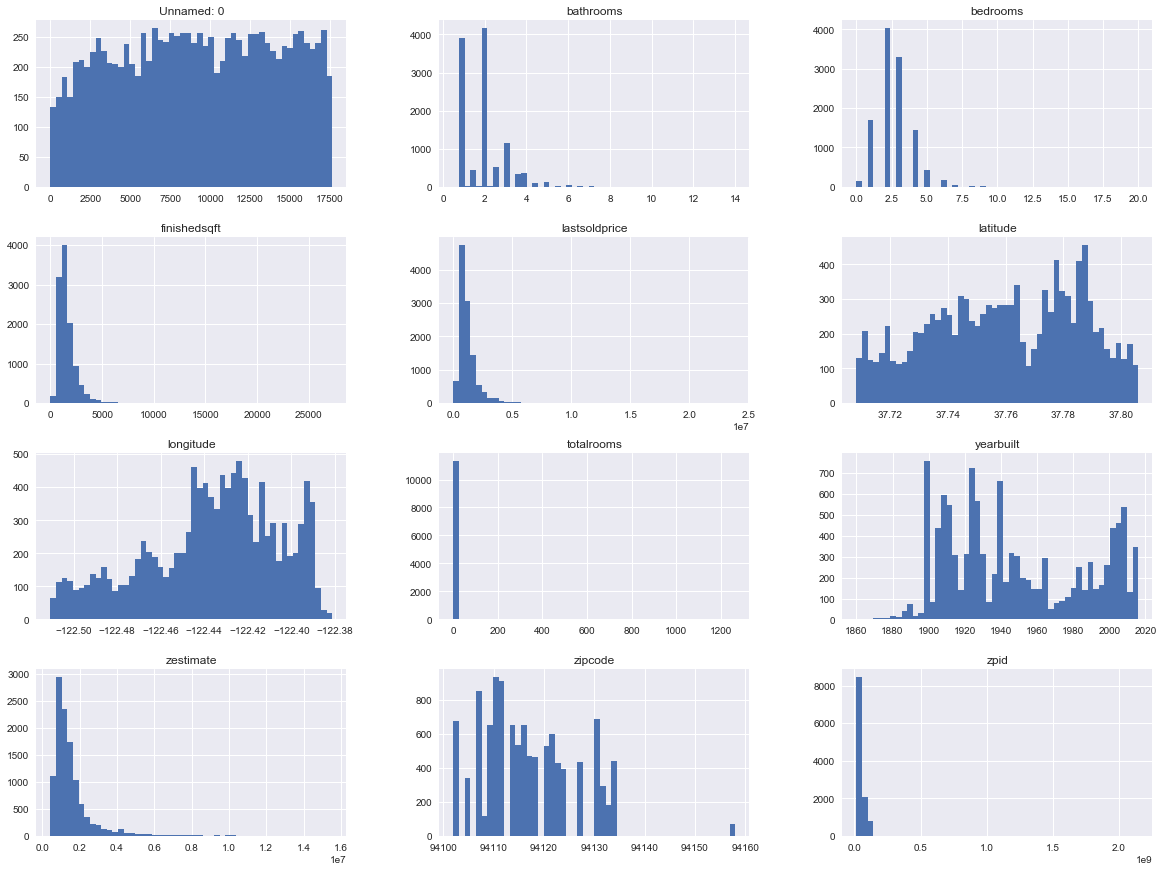

In [12]:
df.hist(bins=50, figsize=(20,15))

### Scatter plot of longitude and latitude

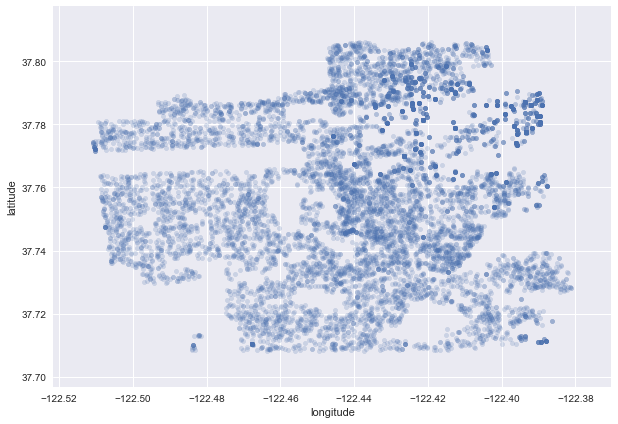

In [14]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2, figsize=(10,7))

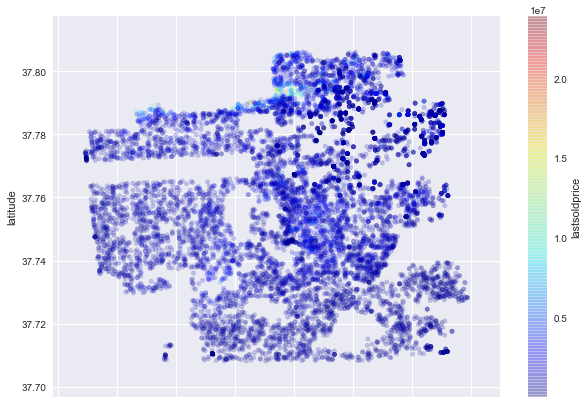

In [17]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2, figsize=(10,7),
       c='lastsoldprice', cmap=plt.get_cmap('jet'))

### Correlation matrix
The target variable is the 'lastsoldprice', so we are going to look at how much each feature variable correlates the target variable.

In [21]:
corr_matrix = df.corr()
corr_matrix['lastsoldprice'].sort_values(ascending=False)

lastsoldprice    1.000000
zestimate        0.876939
finishedsqft     0.647208
bathrooms        0.536880
bedrooms         0.395478
latitude         0.283107
totalrooms       0.093527
zipcode          0.018839
zpid            -0.038444
longitude       -0.052595
Unnamed: 0      -0.134305
yearbuilt       -0.189055
Name: lastsoldprice, dtype: float64

### Scatter matrix between lastsoldprice, zestimate, finishedsqft, bathrooms

In [22]:
scat_cols = ['lastsoldprice', 'zestimate', 'finishedsqft', 'bathrooms']

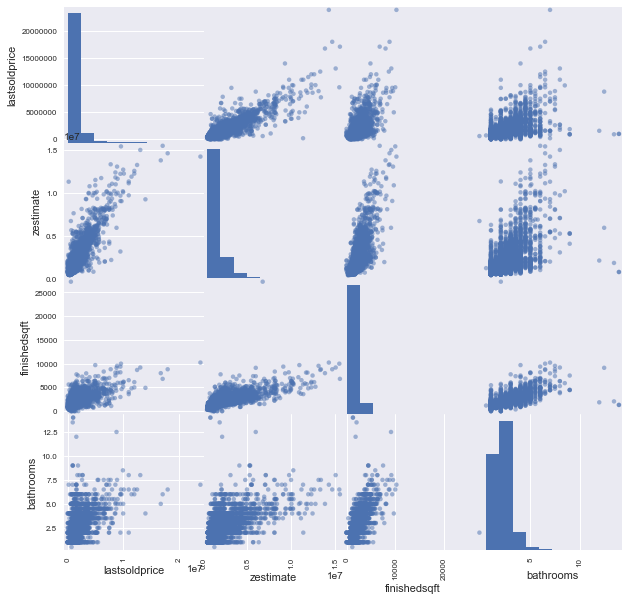

In [28]:
_ = pd.plotting.scatter_matrix(df[scat_cols], figsize = [10, 10],       # c: color, figsize: displayed figure size
                      s = 20, marker = 'o') # s: marker size, marker: marker shape 

# 3. Data Processing

## 3.1 Inspecting outliers
* There are 10 entries with finishedsqft 1, but the sold price could be 1 million, these entries need to be deleted

In [10]:
df[df.finishedsqft <= 200]

,Unnamed: 0,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
916,1919,Address: 373 Lombard Street #202,San FranciscoSales price: 1231000Sales date: ...,373 Lombard St APT 202,2.0,2.0,1.0,10/15/2015,1231000.0,37.803272,-122.407826,Telegraph Hill,4.0,Condominium,1977.0,1275199.0,"1,238,700",94133.0,15064836.0
954,1978,Address: 139 A Leese Street,San FranciscoSales price: 1200000Sales date: ...,139A Leese St,2.0,3.0,1.0,10/09/2015,1200000.0,37.735507,-122.422591,Bernal Heights,6.0,SingleFamily,1902.0,1164836.0,"1,248,000",94110.0,15164340.0
1465,2833,Address: 350 Alabama Street #14,San FranciscoSales price: 1225000Sales date: ...,350 Alabama St APT 14,2.0,1.0,1.0,07/27/2015,1225000.0,37.764810,-122.412710,Mission,3.0,Condominium,2003.0,952756.0,"1,167,700",94110.0,64972813.0
1618,3054,Address: 325 Berry Street #520,San FranciscoSales price: 1485000Sales date: ...,325 Berry St APT 520,2.0,2.0,1.0,07/10/2015,1485000.0,37.773384,-122.395759,South of Market,5.0,MultiFamily2To4,2007.0,1241188.0,"957,300",94158.0,82786558.0
3405,5969,Address: 4221 26th Street,San FranciscoSales price: 1930000Sales date: ...,4221 26th St,2.0,3.0,1.0,11/19/2014,1930000.0,37.747802,-122.434573,Noe Valley,6.0,SingleFamily,1926.0,2142580.0,"1,751,900",94131.0,15181669.0
5103,8399,Address: 1160 Mission Street #1212,San FranciscoSales price: 755000Sales date: 0...,1160 Mission St UNIT 1212,1.0,1.0,1.0,05/23/2014,755000.0,37.778705,-122.412635,South of Market,3.0,MultiFamily2To4,2008.0,1080703.0,"957,300",94103.0,83153419.0
7383,11772,Address: 451 Kansas Street #573,San FranciscoSales price: 635000Sales date: 1...,451 Kansas St UNIT 573,1.0,1.0,1.0,10/02/2013,635000.0,37.764114,-122.402984,Potrero Hill,3.0,Condominium,2007.0,1218798.0,"1,264,000",94107.0,89237750.0
10652,16586,Address: 2924 19th Avenue,San FranciscoSales price: 765000Sales date: 0...,2924 19th Ave,2.0,3.0,1.0,09/04/2012,765000.0,37.733968,-122.474711,Lakeside,7.0,SingleFamily,1939.0,1607701.0,"1,388,300",94132.0,15196754.0
10967,17048,Address: 321 Parnassus Avenue,San FranciscoSales price: 855000Sales date: 0...,321 Parnassus Ave,1.0,2.0,1.0,08/07/2012,855000.0,37.763999,-122.455064,Parnassus - Ashbury,5.0,Condominium,1908.0,1556024.0,"2,111,800",94117.0,15127968.0
11136,17270,Address: 425 1st Street #1308,San FranciscoSales price: 583000Sales date: 1...,425 1st St UNIT 1308,1.0,1.0,1.0,10/13/2011,583000.0,37.786064,-122.392173,South Beach,3.0,SingleFamily,2008.0,2143386.0,"1,269,100",94105.0,82786060.0


In [11]:
df[df.finishedsqft <= 200].count()

Unnamed: 0       10
address          10
info             10
z_address        10
bathrooms        10
bedrooms         10
finishedsqft     10
lastsolddate     10
lastsoldprice    10
latitude         10
longitude        10
neighborhood     10
totalrooms       10
usecode          10
yearbuilt        10
zestimate        10
zindexvalue      10
zipcode          10
zpid             10
dtype: int64

In [12]:
df[(df.finishedsqft>=200) & (df.finishedsqft < 300)]

,Unnamed: 0,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
2499,4517,Address: 195 7th Street #206,San FranciscoSales price: 415000Sales date: 0...,195 7th St APT 206,1.0,0.0,291.0,04/08/2015,415000.0,37.778275,-122.409440,South of Market,2.0,Condominium,1991.0,433999.0,"957,300",94103.0,15147314.0
3199,5687,Address: 766 Harrison Street #703,San FranciscoSales price: 389000Sales date: 1...,766 Harrison St UNIT 703,1.0,1.0,264.0,12/18/2014,389000.0,37.781651,-122.399117,Yerba Buena,2.0,Condominium,2008.0,818720.0,"993,200",94107.0,111934467.0
6485,10447,Address: 544 Huron Avenue,San FranciscoSales price: 713000Sales date: 0...,544 Huron Ave,1.0,1.0,250.0,01/03/2014,713000.0,37.713912,-122.447593,Outer Mission,7.0,SingleFamily,1970.0,708222.0,"804,400",94112.0,15192746.0
7300,11658,Address: 766 Harrison Street #707,San FranciscoSales price: 350000Sales date: 1...,766 Harrison St UNIT 707,1.0,0.0,244.0,10/10/2013,350000.0,37.781650,-122.399116,Yerba Buena,2.0,Condominium,2008.0,715261.0,"993,200",94107.0,111933556.0
7621,12145,Address: 83 McAllister Street,San FranciscoSales price: 415000Sales date: 0...,83 Mcallister St,1.0,0.0,252.0,06/22/2015,720000.0,37.780700,-122.413269,Van Ness - Civic Center,1.0,MultiFamily2To4,1908.0,644581.0,"839,200",94102.0,89240083.0
8134,12887,Address: 766 Harrison Street #806,San FranciscoSales price: 340000Sales date: 0...,766 Harrison St UNIT 806,1.0,0.0,243.0,11/18/2014,371000.0,37.781650,-122.399116,Yerba Buena,2.0,Condominium,2008.0,715922.0,"993,200",94107.0,111925556.0
9156,14408,Address: 766 Harrison Street #610,San FranciscoSales price: 320000Sales date: 0...,766 Harrison St UNIT 610,1.0,0.0,292.0,02/21/2013,320000.0,37.781650,-122.399116,Yerba Buena,2.0,Condominium,2008.0,740071.0,"993,200",94107.0,111924246.0
10553,16455,Address: 766 Harrison Street #409,San FranciscoSales price: 311000Sales date: 0...,766 Harrison St UNIT 409,1.0,0.0,292.0,09/14/2012,311000.0,37.781650,-122.399116,Yerba Buena,2.0,Condominium,2008.0,739114.0,"993,200",94107.0,111933349.0
10988,17071,Address: 83 McAllister Street #412,San FranciscoSales price: 232500Sales date: 0...,83 Mcallister St APT 412,1.0,0.0,265.0,08/03/2012,232500.0,37.780700,-122.413269,Van Ness - Civic Center,1.0,MultiFamily2To4,2007.0,569283.0,"839,200",94102.0,89238056.0


In [13]:
df[(df.finishedsqft>=200) & (df.finishedsqft < 300)].count()

Unnamed: 0       9
address          9
info             9
z_address        9
bathrooms        9
bedrooms         9
finishedsqft     9
lastsolddate     9
lastsoldprice    9
latitude         9
longitude        9
neighborhood     9
totalrooms       9
usecode          9
yearbuilt        9
zestimate        9
zindexvalue      9
zipcode          9
zpid             9
dtype: int64

In [14]:
df[df.finishedsqft <= 200].index

Int64Index([916, 954, 1465, 1618, 3405, 5103, 7383, 10652, 10967, 11136], dtype='int64')

In [15]:
df.drop(df[df.finishedsqft <= 200].index, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11320 entries, 0 to 11329
Data columns (total 19 columns):
Unnamed: 0       11320 non-null int64
address          11320 non-null object
info             11320 non-null object
z_address        11320 non-null object
bathrooms        11320 non-null float64
bedrooms         11320 non-null float64
finishedsqft     11320 non-null float64
lastsolddate     11320 non-null object
lastsoldprice    11320 non-null float64
latitude         11320 non-null float64
longitude        11320 non-null float64
neighborhood     11320 non-null object
totalrooms       11320 non-null float64
usecode          11320 non-null object
yearbuilt        11320 non-null float64
zestimate        11320 non-null float64
zindexvalue      11320 non-null object
zipcode          11320 non-null float64
zpid             11320 non-null float64
dtypes: float64(11), int64(1), object(7)
memory usage: 1.7+ MB


In [17]:
df.describe()

,Unnamed: 0,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zestimate,zipcode,zpid
count,11320.000000,11320.000000,11320.000000,11320.000000,1.132000e+04,11320.000000,11320.000000,11320.000000,11320.000000,1.132000e+04,11320.000000,1.132000e+04
mean,9172.161131,1.980565,2.615106,1586.820583,1.264103e+06,37.759706,-122.436532,6.112986,1948.480477,1.565808e+06,94116.908746,3.689004e+07
std,4920.685247,1.047658,1.299623,921.181339,1.042453e+06,0.025581,0.030744,12.131005,37.902178,1.229897e+06,9.391386,7.803493e+07
min,2.000000,0.500000,0.000000,243.000000,5.350000e+02,37.708170,-122.510726,1.000000,1860.000000,4.323850e+05,94102.000000,1.506329e+07
25%,5042.750000,1.000000,2.000000,1019.750000,7.290000e+05,37.739285,-122.455204,4.000000,1915.750000,9.049635e+05,94110.000000,1.510844e+07
50%,9199.500000,2.000000,2.000000,1362.000000,9.900000e+05,37.760508,-122.432510,5.000000,1940.000000,1.230580e+06,94115.000000,1.515693e+07
75%,13374.250000,2.000000,3.000000,1877.250000,1.450000e+06,37.781386,-122.413399,7.000000,1986.000000,1.731554e+06,94123.000000,5.970040e+07
max,17632.000000,14.000000,20.000000,27275.000000,2.388900e+07,37.806083,-122.381201,1264.000000,2016.000000,1.553325e+07,94158.000000,2.146999e+09


## 3.2 Drop text data
* Unnamed column has no useful information, need to drop
* House location can be determined by feature latitude and longitude, thus column address, z_address can be dropped
* Column info is a summary information which can be found in other columns, thus can be dropped

In [18]:
df.drop(['Unnamed: 0', 'address', 'info', 'z_address'], axis=1, inplace=True)

In [19]:
df.head()

,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,83152781.0
1,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,69819817.0
2,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,64972847.0
3,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,15149489.0
4,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110.0,15161978.0


## 3.3 Convert  zindexvalue to  numerical

In [20]:
df.zindexvalue = df.zindexvalue.str.replace(',', '')

In [21]:
df.zindexvalue = pd.to_numeric(df.zindexvalue)

## 3.3 Convert lastsolddate to datatype 
* We first drop lastsolddate

In [22]:
df.lastsolddate = pd.to_datetime(df.lastsolddate)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11320 entries, 0 to 11329
Data columns (total 15 columns):
bathrooms        11320 non-null float64
bedrooms         11320 non-null float64
finishedsqft     11320 non-null float64
lastsolddate     11320 non-null datetime64[ns]
lastsoldprice    11320 non-null float64
latitude         11320 non-null float64
longitude        11320 non-null float64
neighborhood     11320 non-null object
totalrooms       11320 non-null float64
usecode          11320 non-null object
yearbuilt        11320 non-null float64
zestimate        11320 non-null float64
zindexvalue      11320 non-null int64
zipcode          11320 non-null float64
zpid             11320 non-null float64
dtypes: datetime64[ns](1), float64(11), int64(1), object(2)
memory usage: 1.4+ MB


In [24]:
df.drop('lastsolddate', axis=1, inplace=True)

## 3.5 Get dummy variables
* Convert usecode
* Convert neighborhood

In [25]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zestimate,zindexvalue,...,neighborhood_Yerba Buena,usecode_Condominium,usecode_Cooperative,usecode_Duplex,usecode_Miscellaneous,usecode_Mobile,usecode_MultiFamily2To4,usecode_MultiFamily5Plus,usecode_SingleFamily,usecode_Townhouse
0,2.0,2.0,1043.0,1300000.0,37.778705,-122.412635,4.0,2007.0,1167508.0,975700,...,0,1,0,0,0,0,0,0,0,0
1,1.0,1.0,903.0,750000.0,37.777641,-122.393417,3.0,2004.0,823719.0,975700,...,0,1,0,0,0,0,0,0,0,0
2,4.0,3.0,1425.0,1495000.0,37.759198,-122.396516,6.0,2003.0,1708594.0,1277600,...,0,1,0,0,0,0,0,0,0,0
3,3.0,3.0,2231.0,2700000.0,37.761886,-122.396769,10.0,1927.0,2411236.0,1277600,...,0,0,0,0,0,0,0,0,1,0
4,3.0,3.0,1300.0,1530000.0,37.740795,-122.413453,4.0,1900.0,1918539.0,1248000,...,0,0,0,0,0,0,0,0,1,0


# 4. Preparing X and y

In [26]:
X = df.drop('lastsoldprice', axis=1).values
y = df.lastsoldprice.values

In [27]:
X.shape

(11320, 90)

In [28]:
y.shape

(11320,)

## 4.1 Train Test split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =21)

# 5. Linear Regression

### Setup pipeline

In [30]:
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
         ('linreg', LinearRegression())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

### Fit and predict

In [31]:
# Fit to the training set
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linreg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

### Score

In [32]:
# Compute and print the metrics
r2 = pipeline.score(X_test, y_test)
print("Linear regression R squared: {}".format(r2))

Linear regression R squared: 0.7661335128688159


# 6. Ridge regression

In [33]:
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
         ('ridge', Ridge())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

### Hyperparameter setup

In [34]:
# Specify the hyperparameter space
parameters = {'ridge__alpha':np.logspace(-3,-2,50)}

### Fit and predict

In [35]:
# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, param_grid = parameters)

# Fit to the training set
gm_cv.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'ridge__alpha': array([0.001  , 0.00105, 0.0011 , 0.00115, 0.00121, 0.00126, 0.00133,
       0.00139, 0.00146, 0.00153, 0.0016 , 0.00168, 0.00176, 0.00184,
       0.00193, 0.00202, 0.00212, 0.00222, 0.00233, 0.00244, 0.00256,
       0.00268, 0.00281, 0.00295, 0.00309, 0.00324, 0.00339, 0...55, 0.00687,
       0.0072 , 0.00754, 0.00791, 0.00829, 0.00869, 0.0091 , 0.00954,
       0.01   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

### Score

In [36]:
# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print('Ridge regression on traning data best score: {}'.format(gm_cv.best_score_))
print("Tuned Ridge Alpha: {}".format(gm_cv.best_params_))
print("Tuned Ridge R squared: {}".format(r2))

Ridge regression on traning data best score: 0.7822030975403489
Tuned Ridge Alpha: {'ridge__alpha': 0.006551285568595509}
Tuned Ridge R squared: 0.7661215209994056


# 7. Lasso regression

In [68]:
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
         ('lasso', Lasso())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

### Hyperparameter setup

In [65]:
# Specify the hyperparameter space
parameters = {'lasso__alpha':np.logspace(-4,0,20)}

### Fit and predict

In [66]:
# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, param_grid = parameters)

# Fit to the training set
gm_cv.fit(X_train, y_train)

C:\Users\Yang\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Yang\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Yang\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Yang\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\Yang\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Yang\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Yang\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Yang\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\Yang\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', Lasso(alpha=0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'lasso__alpha': array([1.00000e-04, 1.62378e-04, 2.63665e-04, 4.28133e-04, 6.95193e-04,
       1.12884e-03, 1.83298e-03, 2.97635e-03, 4.83293e-03, 7.84760e-03,
       1.27427e-02, 2.06914e-02, 3.35982e-02, 5.45559e-02, 8.85867e-02,
       1.43845e-01, 2.33572e-01, 3.79269e-01, 6.15848e-01, 1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

### Score

In [67]:
# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print('Lasso regression on traning data best score: {}'.format(gm_cv.best_score_))
print("Tuned Lasso Alpha: {}".format(gm_cv.best_params_))
print("Tuned Lasso R squared: {}".format(r2))

Lasso regression on traning data best score: 0.7778450979552863
Tuned Lasso Alpha: {'lasso__alpha': 0.0001}
Tuned Lasso R squared: 0.7607222908255488


# 8. Elasticnet regression

### Setup pipeline

In [75]:
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

### Hyperparameter setup

In [76]:
# Specify the hyperparameter space

alpha = np.linspace(0.00001, 10, 30)
l1_space = np.linspace(0.00001, 1, 30)

parameters = {'elasticnet__l1_ratio': l1_space,
             'elasticnet__alpha': alpha}

### Fit and predict

In [77]:
# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, param_grid = parameters)

# Fit to the training set
gm_cv.fit(X_train, y_train)

C:\Users\Yang\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Yang\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Yang\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Yang\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\Yang\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Yang\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Yang\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Yang\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\Yang\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Yang\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Yang\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Yang\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\Yang\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Yang\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Yang\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Yang\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\Yang\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Yang\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Yang\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Yang\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\Yang\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Yang\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Yang\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Yang\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('elasticnet', ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'elasticnet__l1_ratio': array([1.00000e-05, 3.44924e-02, 6.89748e-02, 1.03457e-01, 1.37940e-01,
       1.72422e-01, 2.06904e-01, 2.41387e-01, 2.75869e-01, 3.10352e-01,
       3.44834e-01, 3.79317e-01, 4.13799e-01, 4.48281e-01, 4.82764e-01,
       5.17246e-01, 5.51729e-01, 5.86211e-01, 6.... 7.93104e+00, 8.27586e+00,
       8.62069e+00, 8.96552e+00, 9.31035e+00, 9.65517e+00, 1.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

### Score

In [78]:
# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print('Elasticnet regression on traning data best score: {}'.format(gm_cv.best_score_))
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

Elasticnet regression on traning data best score: 0.7778450986445254
Tuned ElasticNet l1 ratio: {'elasticnet__alpha': 1e-05, 'elasticnet__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.7607222913410974


# 9. Conclusion
The linear regression and ridge regression gives us the best r squared score: 0.766